In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from sklearn.datasets import load_iris

In [27]:
dataset = load_iris()

In [28]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [31]:
X = df
y = dataset.target

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
classifier = DecisionTreeClassifier()

In [35]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

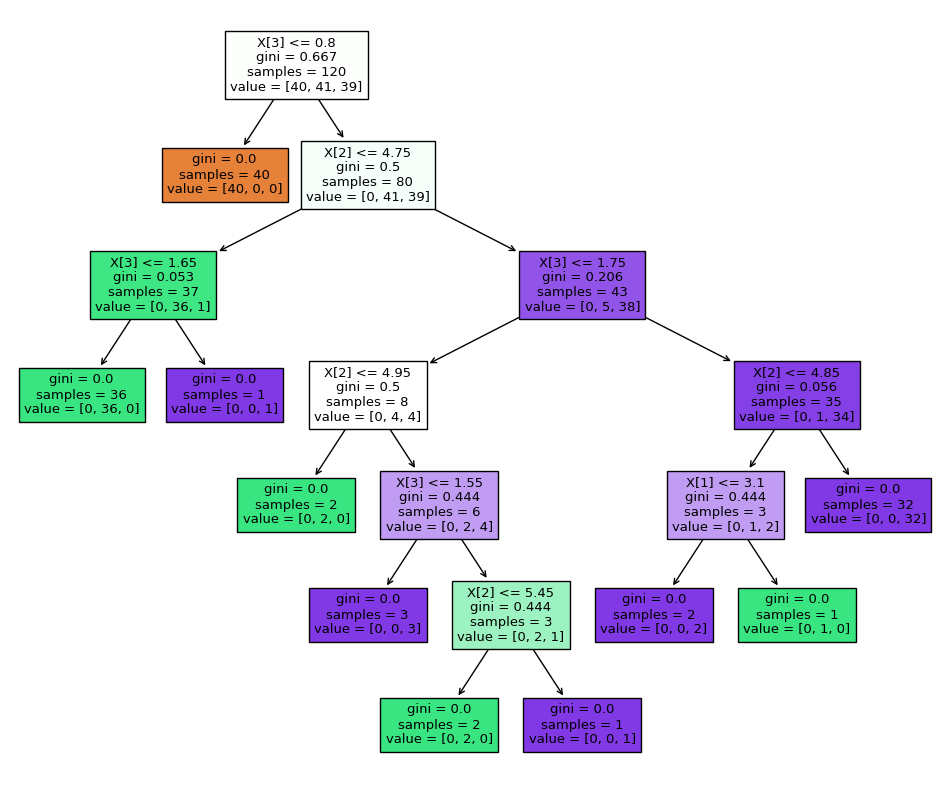

In [36]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

Post Prunning (Small Datasets)

In [37]:
classifier = DecisionTreeClassifier(max_depth=2,criterion='entropy')

In [38]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]')]

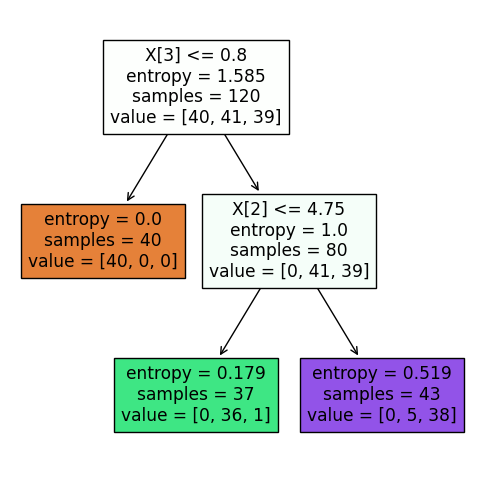

In [39]:
from sklearn import tree
plt.figure(figsize=(6,6))
tree.plot_tree(classifier,filled=True)

In [41]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test,y_pred)
print(score)

0.9666666666666667


Pre Prunning

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [57]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [59]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [60]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [61]:
clf.best_score_

0.9583333333333334

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test,y_pred)             
print(score)

1.0
